In [ ]:
!pip install fastdtw
!pip install pyts
!pip install dtw-python
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn

import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300
# savefig_options = dict(format="png", dpi=300, bbox_inches="tight")

# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [4]:
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist

In [5]:
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]

    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]

    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j]

    return cost

In [6]:
# Create two sequences
x = [3, 1, 2, 2, 1]
y = [2, 0, 0, 3, 3, 1, 0]

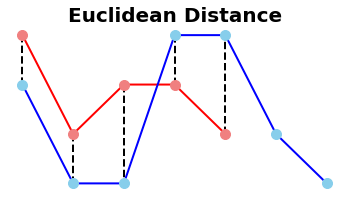

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=2)

ax.plot(x, '-ro', label='x', linewidth=2, markersize=10, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=2, markersize=10, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("Euclidean Distance", fontsize=20, fontweight="bold")

fig.savefig("ex1_euclidean_distance.png")

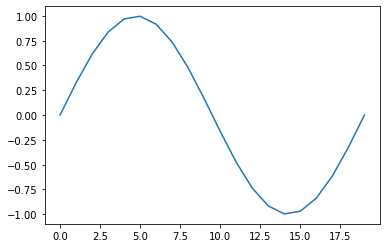

In [8]:
sin_range = np.linspace(0, 2 * np.pi, 20)
sin_points = [np.sin(x) for x in sin_range]
plt.plot(np.arange(20),sin_points)

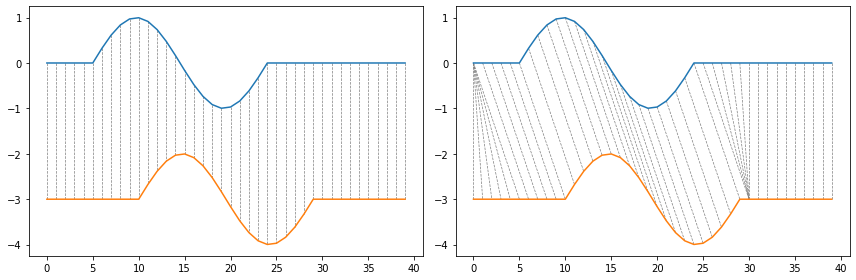

In [9]:
ts1 = np.concatenate([np.zeros(5), np.array(sin_points), np.zeros(15)])
ts2 = np.concatenate([np.zeros(10),np.array(sin_points), np.zeros(10)])-3
ts1_ = [(i, ts1[i]) for i in np.arange(0, len(ts1))]
ts2_ = [(j, ts2[j]) for j in np.arange(0, len(ts2))]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for i, j in zip(ts1_, ts2_):
    plt.plot([i[0], j[0]], [i[1], j[1]], linestyle='dashed', linewidth='0.7', c='gray')
plt.plot(ts1)
plt.plot(ts2)

plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot([ts1_[0][0],ts2_[i][0]], [ts1_[0][1], ts2_[i][1]], linestyle='dashed', linewidth='0.7', c='gray')
for i in range(5, 30):
     plt.plot([ts1_[i-5][0],ts2_[i][0]], [ts1_[i-5][1], ts2_[i][1]], linestyle='dashed', linewidth='0.7', c='gray')
for i in range(30, 36):
    plt.plot([ts1_[i-5][0],ts2_[30][0]], [ts1_[i-5][1], ts2_[30][1]], linestyle='dashed', linewidth='0.7', c='gray')
for i in range(31, 40):
     plt.plot([ts1_[i][0],ts2_[i][0]], [ts1_[i][1], ts2_[i][1]], linestyle='dashed', linewidth='0.7', c='gray')
plt.plot(ts1)
plt.plot(ts2)

plt.tight_layout()
plt.show()

In [24]:
def get_dtw(left, slide, length):
    ts1 = np.concatenate([np.zeros(left), np.array(sin_points), np.zeros(length-left)])
    ts2 = np.concatenate([np.zeros(left+slide),np.array(sin_points), np.zeros(length-(left+slide))]) # 計算用
    ts3 = ts2 - 2.5 # 描画用
    ts1_ = [(i, ts1[i]) for i in np.arange(0, len(ts1))]
    ts3_ = [(j, ts3[j]) for j in np.arange(0, len(ts3))]

    euclid_distance = round(np.sum(np.abs(ts1-ts2)),18)
    dtw_distance, warp_path = fastdtw(ts1, ts2)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'euclid distance: {round(euclid_distance,2)}')
    for i, j in zip(ts1_, ts3_):
        plt.plot([i[0], j[0]], [i[1], j[1]], linestyle='dashed', linewidth='0.7', c='gray')
    plt.plot(ts1)
    plt.xticks([])
    plt.yticks([])
    plt.plot(ts3)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.title(f'dtw distance: {dtw_distance}')
    plt.plot(ts1)
    plt.xticks([])
    plt.yticks([])
    plt.plot(ts3)
    plt.xticks([])
    plt.yticks([])

    for [map_x, map_y] in warp_path:
        plt.plot([map_x, map_y], [ts1[map_x], ts3[map_y]], linestyle='dashed', linewidth='0.7', c='gray')

    return euclid_distance, dtw_distance, warp_path

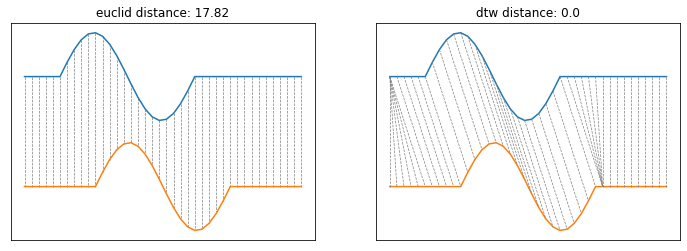

In [25]:
euclid_dist, dtw_dist, warp_path = get_dtw(5, 5, 20)

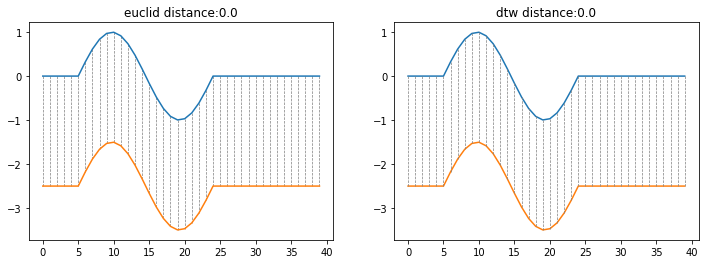

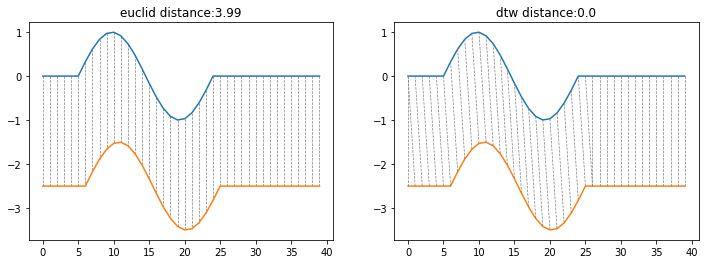

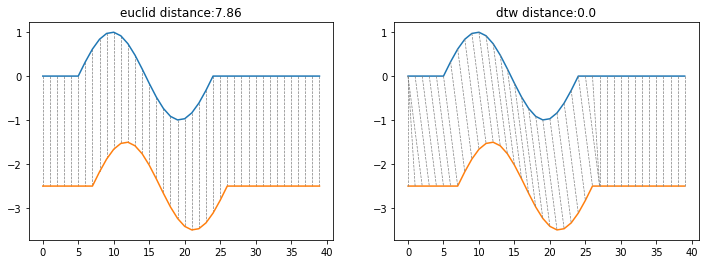

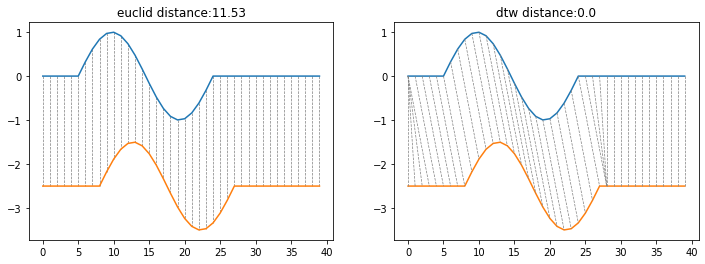

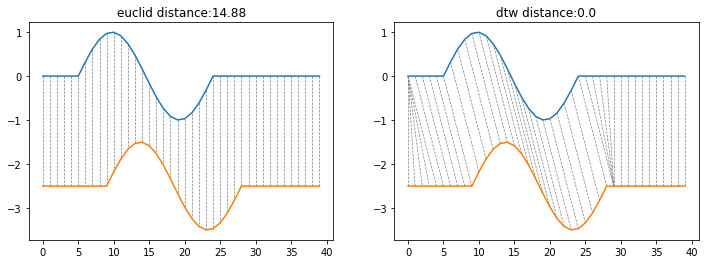

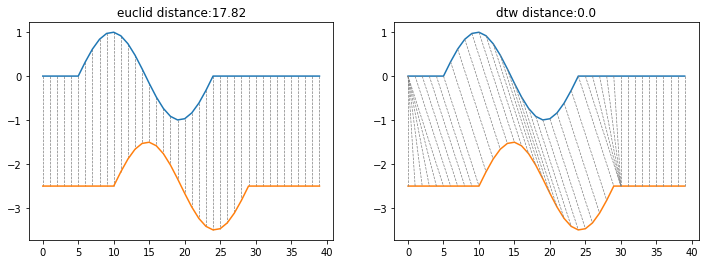

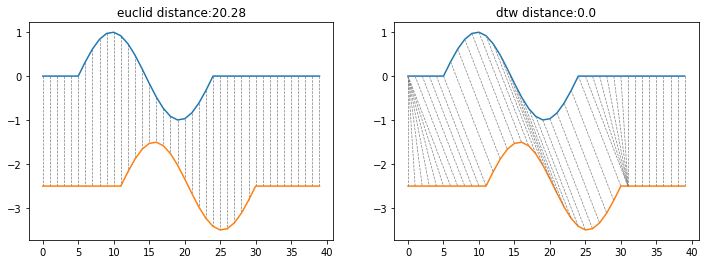

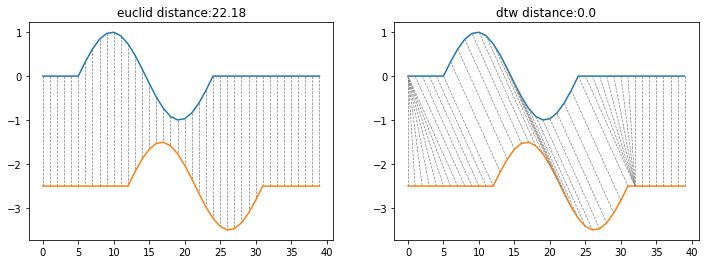

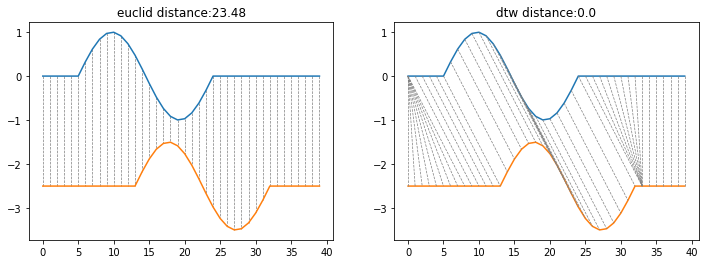

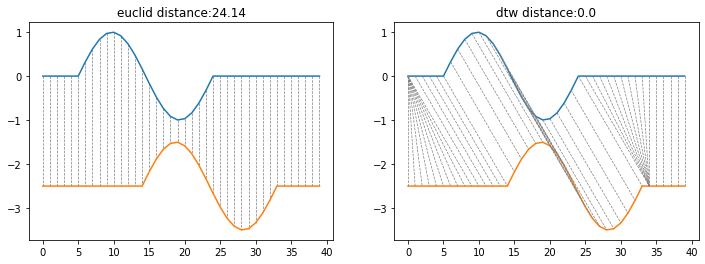

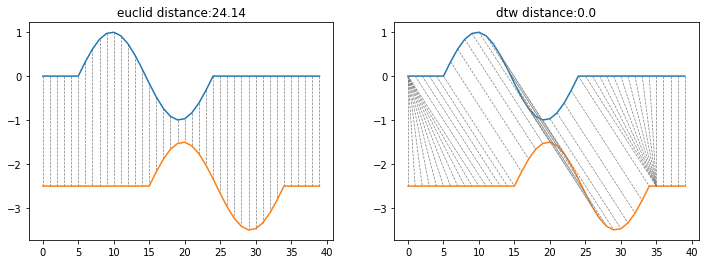

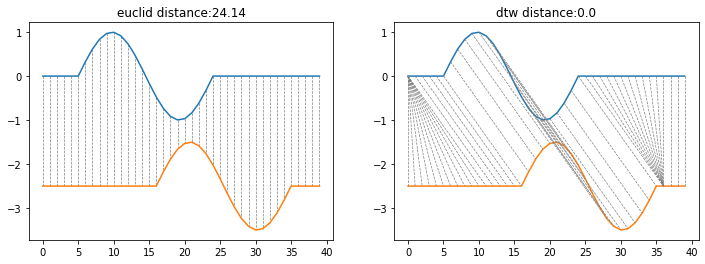

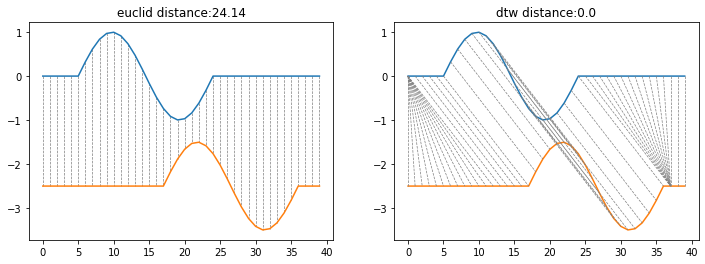

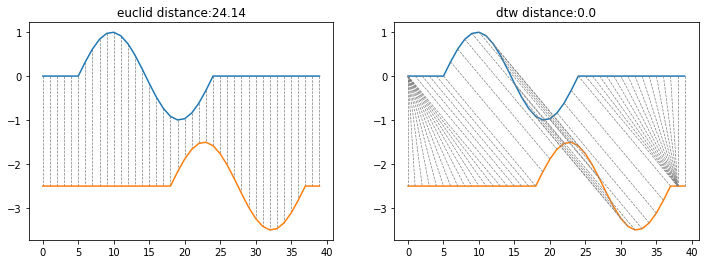

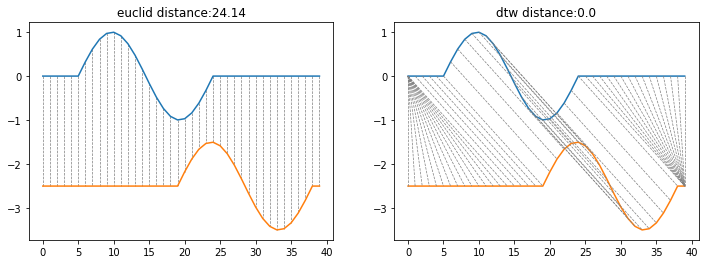

In [22]:
# slide = 0 # 0..15
left = 5
length = 20

dwt_distance_list = []
euclid_distance_list = []
for slide in np.arange(15):
    ts1 = np.concatenate([np.zeros(left), np.array(sin_points), np.zeros(length-left)])
    ts2 = np.concatenate([np.zeros(left+slide),np.array(sin_points), np.zeros(length-(left+slide))]) # 計算用
    ts3 = ts2 - 2.5 # 描画用
    ts1_ = [(i, ts1[i]) for i in np.arange(0, len(ts1))]
    ts3_ = [(j, ts3[j]) for j in np.arange(0, len(ts3))]

    euclid_distance = round(np.sum(np.abs(ts1-ts2)),18)
    euclid_distance_list.append(euclid_distance)
    dtw_distance, warp_path = fastdtw(ts1, ts2)
    dwt_distance_list.append(dtw_distance)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'euclid distance:{round(euclid_distance,2)}')
    for i, j in zip(ts1_, ts3_):
        plt.plot([i[0], j[0]], [i[1], j[1]], linestyle='dashed', linewidth='0.7', c='gray')
    plt.plot(ts1)
    plt.plot(ts3)

    plt.subplot(1, 2, 2)
    plt.title(f'dtw distance:{dtw_distance}')
    plt.plot(ts1)
    plt.plot(ts3)
    for [map_x, map_y] in warp_path:
        plt.plot([map_x, map_y], [ts1[map_x], ts3[map_y]], linestyle='dashed', linewidth='0.7', c='gray')

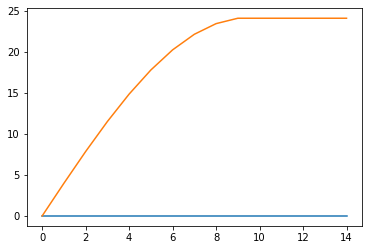

In [21]:
plt.plot(dwt_distance_list)
plt.plot(euclid_distance_list)

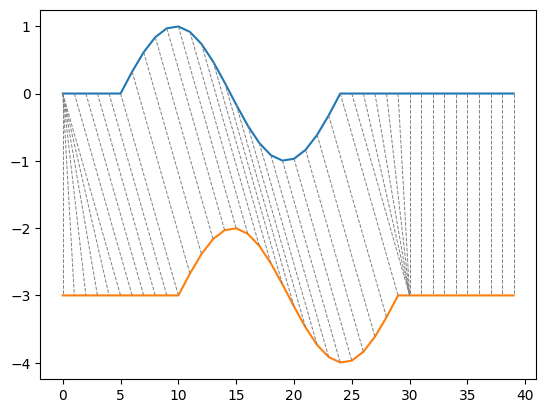

In [198]:
plt.plot(ts1)
plt.plot(ts2)

for [map_x, map_y] in warp_path:
    plt.plot([map_x, map_y], [ts1[map_x], ts2[map_y]], linestyle='dashed', linewidth='0.7', c='gray')